# Suavizamiento de imágenes (Image smoothing)

## Filtros

Sea $I$ una imagen de tamaño $m \times n$ y $w$ una matriz de tamaño $(2a + 1) \times (2b + 1)$. Definimos una **convolución** sobre $I$ como
$$I^{Filtered}(i, j) = \sum_{k = -a}^{a} \sum_{l = -b}^{b} w(k, l) I(i + k, j + l).$$
Aquí, $I$ es la imagen original, $I^{Filtered}$ es la imagen filtrada y $w$ es el kernel del filtro. Intuitivamente, cada pixel de la imagen filtrada es una suma ponderada de los pixeles vecinos del mismo en la imagen original.

<img src="https://miro.medium.com/max/928/0*e-SMFTzO8r7skkpc" height="auto" width="450">

### Relleno (padding)

Para calcular los pixeles de la imagen filtrada que se encuentran en los bordes, se require sumar pixeles fuera de la imagen original. Existen varios métodos para manejar los bordes de la imagen, entre ellos:

- Rellenar los bordes con alguna constante.
```
>>> pad([1, 2, 3, 4, 5], (2, 2), 'constant')
[0, 0, 1, 2, 3, 4, 5, 0, 0]
```
- Rellenar los bordes con los valores en los extremos.
```
>>> pad([1, 2, 3, 4, 5], (2, 2) 'edge')
[1, 1, 1, 2, 3, 4, 5, 5, 5]
```
- Rellenar los bordes reflejando la imagen.
```
>>> pad([1, 2, 3, 4, 5], (2, 2) 'reflect')
[3, 2, 1, 2, 3, 4, 5, 4, 3]
>>> pad([1, 2, 3, 4, 5], (2, 2) 'symmetric')
[2, 1, 1, 2, 3, 4, 5, 5, 4]
```
- Rellenar los bordes concatenando la imagen múltiples veces.
```
>>> pad([1, 2, 3, 4, 5], (2, 2) 'wrap')
[4, 5, 1, 2, 3, 4, 5, 1, 2]
```

### Ejemplos

Dependiendo del kernel, el efecto en la imagen filtrada será distinto.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ImageFiltering import *

In [2]:
img = cv2.imread('imagenes/flor.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Filtro de caja.
kernel = np.ones((7, 7)) / 49
box_filter = filter2d(img, kernel, 'reflect')

# Filtro para detección de bordes.
kernel = np.array([[ 1, 0, -1], 
                   [ 0, 0,  0], 
                   [-1, 0,  1]])
edge_detection = filter2d(img, kernel, 'reflect')

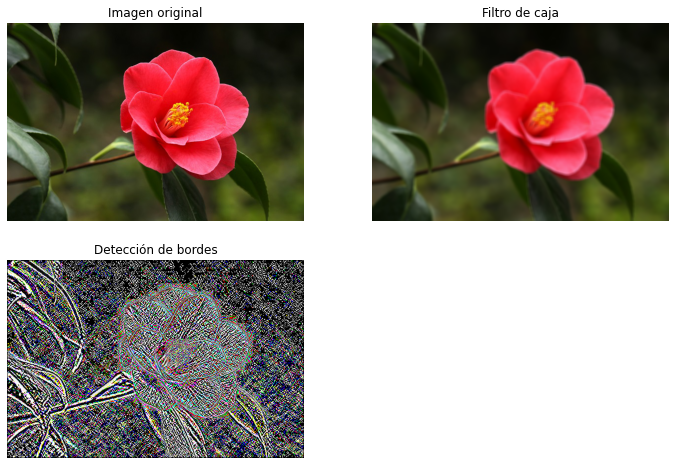

In [3]:
plot_images(
    2, 2, [img, box_filter, edge_detection], 
    fig = plt.figure(figsize = (12, 8)), 
    title = ['Imagen original', 'Filtro de caja', 'Detección de bordes']
)
plt.show()

### Filtro de Sobel

El operador de Sobel, o filtro de Sobel, es un filtro que permite calcular aproximaciones a las derivadas de la imagen. El kernel que describe a las derivadas horizontal y vertical, respectivamente, es
\begin{align*}
K_x = \begin{bmatrix}1 & 0 & -1\\ 2 & 0 & -2\\ 1 & 0 & -1\end{bmatrix} && 
K_y = \begin{bmatrix}1 & 2 & 1\\ 0 & 0 & 0\\ -1 & -2 & -1\end{bmatrix}
\end{align*}

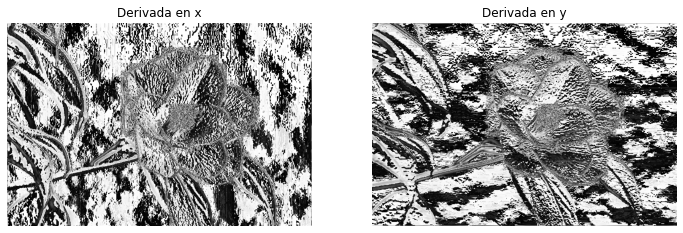

In [4]:
# Derivada en x.
img_dx = sobel(img, 1, 0)
img_dx = cv2.cvtColor(img_dx, cv2.COLOR_RGB2GRAY)

# Derivada en y.
img_dy = sobel(img, 0, 1)
img_dy = cv2.cvtColor(img_dy, cv2.COLOR_RGB2GRAY)

plot_images(
    1, 2, [img_dx, img_dy], 
    fig = plt.figure(figsize = (12, 6)), 
    title = ['Derivada en x', 'Derivada en y'],
    cmap = ['gray_r', 'gray_r']
)
plt.show()

## Reducción de ruido

### Desenfoque gaussiano

El desenfoque gaussiano es un filtro que suaviza una imagen mediante una función Gaussiana. El kernel que describe a este filtro está dado por
$$K(i, j) = \alpha\exp\left(-\frac{i^2 + j^2}{2\sigma^2}\right), \qquad -a \leq i \leq a, \ -b \leq j \leq b,$$
donde $\alpha$ es una constante escogida de tal manera que todos los elementos del kernel sumen 1
$$\sum_{i = -a}^{a} \sum_{j = -b}^{b} K(i, j) = 1,$$
y $\sigma > 0$ es la desviación estándar.

### Filtro de mediana

El filtro de mediana es un filtro en donde cada pixel de la imagen filtrada es la mediana de los pixeles vecinos del mismo en la imagen original
$$I^{Filtered}(i, j) = \text{mediana } \left\{I(i + k, j + l) : -a \leq k \leq a, \ -b \leq l \leq b\right\}.$$
Este filtro es bastante efectivo para eliminar ruido del tipo *sal y pimienta*.

### Difusión anisotrópica

La difusión anisotrópica es una técnica utilizada para reducir el ruido de una imagen que preserva algunos detalles importantes de la imagen como los bordes. La imágen resultante es solución a la ecuación diferencial
$$\frac{\partial I}{\partial t} = \text{div}\left(c(x, y, t)\nabla I\right),$$
donde $c(x, y, t)$ es el coeficiente de difusión, usualmente escogido como una función del gradiente de la imagen. Perona y Malik propusieron los siguientes coeficientes
$$c(\left\lVert\nabla I\right\rVert) = e^{-\left(\left\lVert\nabla I\right\rVert / K\right)^2}$$
y
$$c(\left\lVert\nabla I\right\rVert) = \frac{1}{1 + \left(\frac{\left\lVert\nabla I\right\rVert}{K}\right)^2},$$
donde $K$ es una constante que controla la sensibilidad a los bordes. 

### Comparación entre métodos

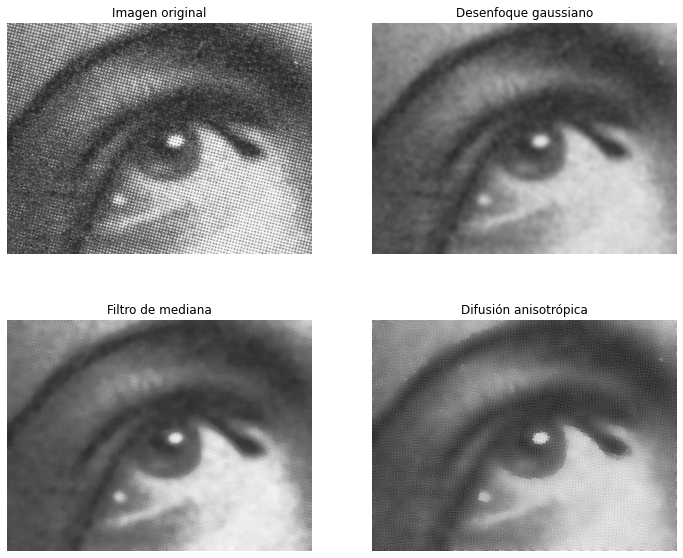

In [5]:
img = cv2.imread('imagenes/ojo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_out1 = gaussian_blur(img, 15, 2.5, 'reflect')
img_out2 = median_filter(img, 11, 'reflect')
img_out3 = anisotropic_diffusion(img, 40, 'inv')

plot_images(
    2, 2, [img, img_out1, img_out2, img_out3], 
    fig = plt.figure(figsize = (12, 10)), 
    title = ['Imagen original', 'Desenfoque gaussiano', 
             'Filtro de mediana', 'Difusión anisotrópica']
)
plt.show()

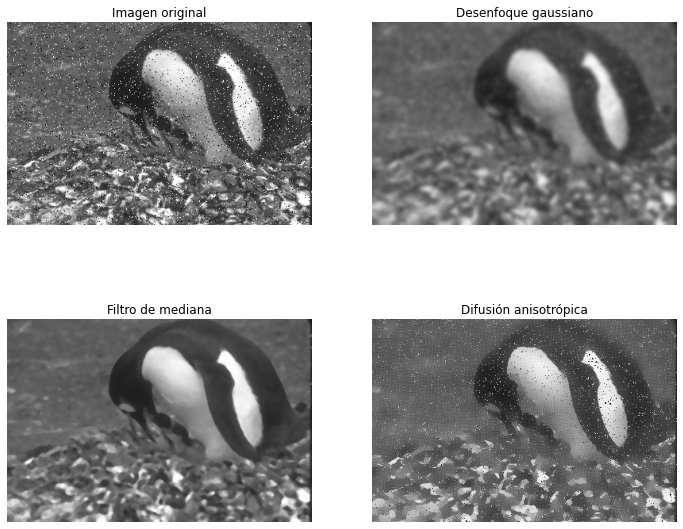

In [6]:
img = cv2.imread('imagenes/pinguino.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_out1 = gaussian_blur(img, 15, 2.5, 'reflect')
img_out2 = median_filter(img, 5, 'reflect')
img_out3 = anisotropic_diffusion(img, 30, 'inv')

plot_images(
    2, 2, [img, img_out1, img_out2, img_out3], 
    fig = plt.figure(figsize = (12, 10)), 
    title = ['Imagen original', 'Desenfoque gaussiano', 
             'Filtro de mediana', 'Difusión anisotrópica']
)
plt.show()

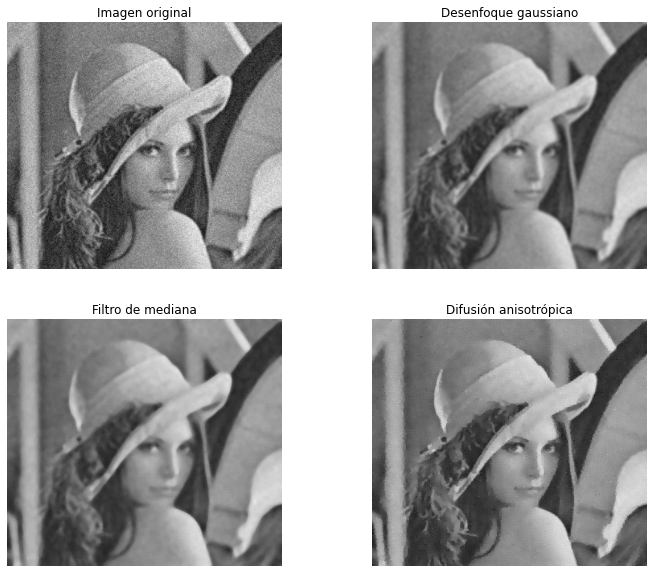

In [7]:
img = cv2.imread('imagenes/lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_out1 = gaussian_blur(img, 21, 3.0, 'reflect')
img_out2 = median_filter(img, 13, 'reflect')
img_out3 = anisotropic_diffusion(img, 50, 'exp')

plot_images(
    2, 2, [img, img_out1, img_out2, img_out3], 
    fig = plt.figure(figsize = (12, 10)), 
    title = ['Imagen original', 'Desenfoque gaussiano', 
             'Filtro de mediana', 'Difusión anisotrópica']
)
plt.show()

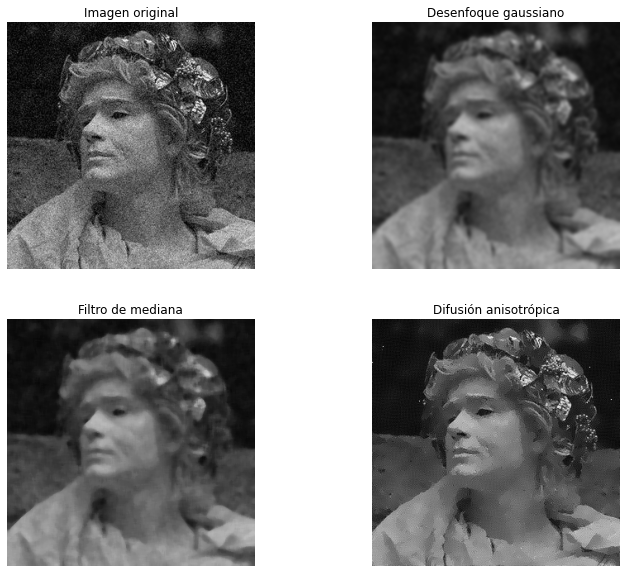

In [8]:
img = cv2.imread('imagenes/estatua.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_out1 = gaussian_blur(img, 15, 2.0, 'reflect')
img_out2 = median_filter(img, 7, 'reflect')
img_out3 = anisotropic_diffusion(img, 15, 'inv')

plot_images(
    2, 2, [img, img_out1, img_out2, img_out3], 
    fig = plt.figure(figsize = (12, 10)), 
    title = ['Imagen original', 'Desenfoque gaussiano', 
             'Filtro de mediana', 'Difusión anisotrópica']
)
plt.show()

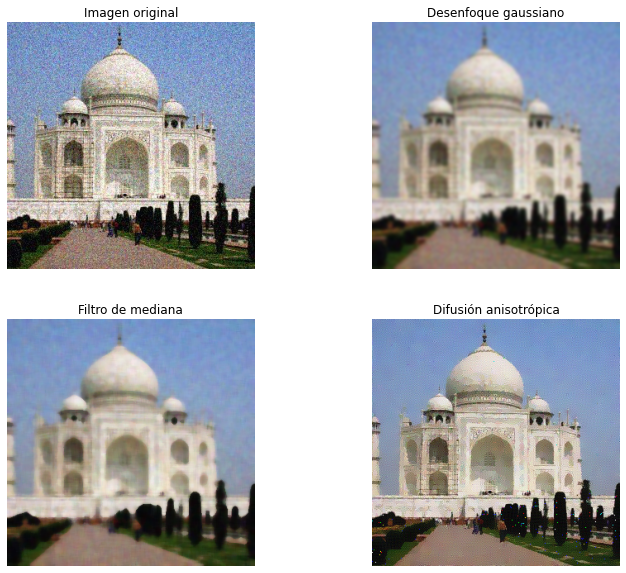

In [9]:
img = cv2.imread('imagenes/taj-majal.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_out1 = gaussian_blur(img, 21, 2.0, 'reflect')
img_out2 = median_filter(img, 7, 'reflect')
img_out3 = anisotropic_diffusion(img, 15, 'inv')

plot_images(
    2, 2, [img, img_out1, img_out2, img_out3], 
    fig = plt.figure(figsize = (12, 10)), 
    title = ['Imagen original', 'Desenfoque gaussiano', 
             'Filtro de mediana', 'Difusión anisotrópica']
)
plt.show()

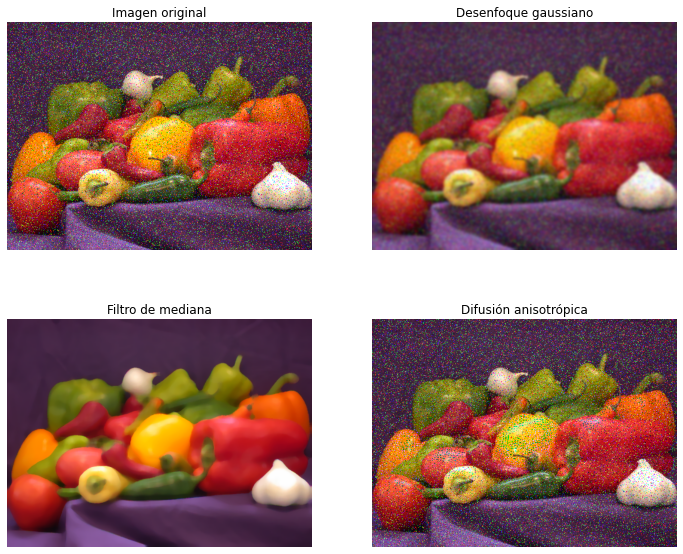

In [10]:
img = cv2.imread('imagenes/peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_out1 = gaussian_blur(img, 21, 2.0, 'reflect')
img_out2 = median_filter(img, 11, 'reflect')
img_out3 = anisotropic_diffusion(img, 10, 'exp')

plot_images(
    2, 2, [img, img_out1, img_out2, img_out3], 
    fig = plt.figure(figsize = (12, 10)), 
    title = ['Imagen original', 'Desenfoque gaussiano', 
             'Filtro de mediana', 'Difusión anisotrópica']
)
plt.show()